In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
data_dir = "../2023-BigDataVisualization/data/"

In [31]:
datElec = pd.read_csv(data_dir + "G20192-Columnes-ME-EN.csv", sep=";")
datElec = datElec.replace(np.nan,0)
#enseñar
datElec

,Province_code,Province_name,Vegueria_code,Vegueria_name,County_code,County_name,Municipality_code,Municipality_name,District,Section,...,VOX_votes,Cs_votes,PACMA_votes,MASPAIS_votes,RECORTES0_votes,IFEM_votes,PUM+J_votes,PCTC_votes,PCPC_votes,IZQP_votes
0,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,...,0,2,0,0.0,0,0.0,0,0,0,0
1,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,12,14,1,3.0,2,1.0,1,0,0,0
2,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,22,25,2,6.0,2,0.0,0,0,0,1
3,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,32,26,6,11.0,0,0.0,1,0,0,0
4,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,...,19,13,6,5.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,43,Tarragona,7,Terres de l'Ebre,9.0,Baix Ebre,43052,Xerta,1,1,...,9,3,3,0.0,1,0.0,1,0,0,0
8365,8,Barcelona,98,Residents Absents,0.0,0,8998,Residents Absents,1,1,...,785,1262,220,278.0,122,37.0,46,8,19,19
8366,17,Girona,98,Residents Absents,0.0,0,17998,Residents Absents,1,1,...,71,105,23,0.0,11,0.0,4,2,1,2
8367,25,Lleida,98,Residents Absents,0.0,0,25998,Residents Absents,1,1,...,54,76,25,0.0,5,0.0,4,4,2,0


In [ ]:
print(datElec.columns)

In [5]:
VotosporC = datElec.groupby(by=datElec["County_name"]).sum()
#columnas = VotosporC[["VOX Vots", "PSC Vots"]]
VotosporC = pd.concat([VotosporC["Electoral_census"], VotosporC.iloc[:, 19:36]], axis=1)
#PorcporC = VotosporC.iloc[:,2:17].divide(VotosporC.iloc[:,1], axis=0)
#PorcporC

In [ ]:
f, ax = plt.subplots()
#ax.plot(columnas.iloc[:,1],columnas.iloc[:,2])
plt.scatter(columnas.iloc[:,5],columnas.iloc[:,7])
plt.show()
plt.xscale("log")
plt.scatter(VotosporC["Cens"], columnas.iloc[:,1])

In [55]:
#VotosporM = datElec.groupby(by=datElec["Municipality_name"], as_index=False).sum()
VotosporM = datElec.groupby(["Municipality_name","Municipality_code"], as_index=False).sum()
VotosporM = VotosporM.drop(VotosporM[VotosporM["Municipality_name"] == "Residents Absents"].index)
VotosporM = pd.concat([VotosporM[["Municipality_code", "Municipality_name", "Electoral_census"]], VotosporM.iloc[:, 19:36]], axis=1)
VotosporM = VotosporM.sort_values(by=["Municipality_code"], axis=0, ignore_index=True)
PorcporM = VotosporM.iloc[:,3:19].divide(VotosporM.iloc[:,4], axis=0)
PorcporM = pd.concat([VotosporM[["Municipality_code", "Municipality_name", "Electoral_census"]], PorcporM], axis=1)
PorcporM = pd.concat([PorcporM, PorcporM.iloc[:,5:].idxmax(axis=1)], axis=1)
PorcporM.rename(columns = {0 : "Ganador"}, inplace=True)
PorcporM["Ganador"] = PorcporM["Ganador"].str[:-6]
print(PorcporM.columns)
PorcporM

Index(['Municipality_code', 'Municipality_name', 'Electoral_census',
       'Votes_to_parties', 'Valid_votes', 'ERC_votes', 'PSC_votes',
       'ECP_votes', 'JUNTS_votes', 'PP_votes', 'CUP_votes', 'VOX_votes',
       'Cs_votes', 'PACMA_votes', 'MASPAIS_votes', 'RECORTES0_votes',
       'IFEM_votes', 'PUM+J_votes', 'PCTC_votes', 'Ganador'],
      dtype='object')


,Municipality_code,Municipality_name,Electoral_census,Votes_to_parties,Valid_votes,ERC_votes,PSC_votes,ECP_votes,JUNTS_votes,PP_votes,CUP_votes,VOX_votes,Cs_votes,PACMA_votes,MASPAIS_votes,RECORTES0_votes,IFEM_votes,PUM+J_votes,PCTC_votes,Ganador
0,8001,Abrera,9097,0.994280,1.0,0.162951,0.275741,0.193312,0.047815,0.071869,0.031534,0.090202,0.075535,0.019214,0.020534,0.002347,0.001173,0.000587,0.000880,PSC
1,8002,Aguilar de Segarra,217,0.988372,1.0,0.186047,0.046512,0.063953,0.406977,0.023256,0.226744,0.023256,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,JUNTS
2,8003,Alella,7213,0.992420,1.0,0.285635,0.124237,0.094472,0.196524,0.087632,0.071917,0.052320,0.055833,0.009429,0.011278,0.001294,0.001294,0.000370,0.000000,ERC
3,8004,Alpens,208,0.994350,1.0,0.254237,0.033898,0.050847,0.406780,0.000000,0.248588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,JUNTS
4,8005,"Ametlla del Vallès, l'",6425,0.994186,1.0,0.295889,0.099875,0.109012,0.229444,0.066238,0.071844,0.053779,0.043812,0.012874,0.008306,0.001246,0.000208,0.000415,0.000623,ERC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,43903,Camarles,2332,0.987895,1.0,0.451244,0.123739,0.098857,0.145259,0.061870,0.044385,0.025555,0.028917,0.005380,0.000000,0.002017,0.000000,0.000000,0.000000,ERC
943,43904,"Aldea, l'",2864,0.989195,1.0,0.343058,0.193409,0.105889,0.145327,0.070232,0.038358,0.058347,0.023771,0.004322,0.000000,0.000000,0.000000,0.003241,0.001080,ERC
944,43905,Salou,15100,0.995535,1.0,0.161059,0.225857,0.119626,0.080997,0.125545,0.023468,0.139045,0.097404,0.018380,0.000000,0.001661,0.000000,0.001246,0.000415,PSC
945,43906,"Ampolla, l'",2113,0.991892,1.0,0.270946,0.120270,0.120270,0.255405,0.061486,0.064865,0.044595,0.043919,0.008108,0.000000,0.000000,0.000000,0.000000,0.000676,ERC


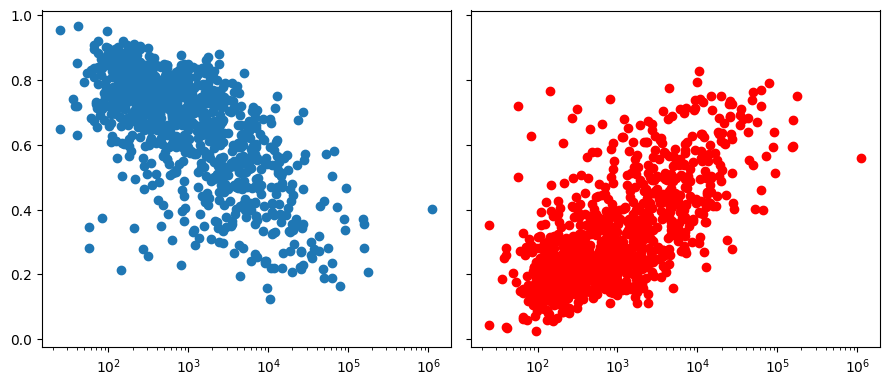

In [15]:
#f, ax = plt.subplots(2,3, sharex=True)
f, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize = (9,4))
plt.xscale("log")
plt.tight_layout()
#ax[0,0].plot(VotosporM["Electoral_census"], PorcporM["ERC_votes"], "bo")
#ax[0,1].plot(VotosporM["Cens"], PorcporM["PSC_votes"], "bo")
#ax[0,2].plot(VotosporM["Cens"], PorcporM["ECP_votes"], "bo")
#ax[1,0].plot(VotosporM["Cens"], PorcporM["JUNTS_votes"], "bo")
#ax[1,1].plot(VotosporM["Cens"], PorcporM["PP_votes"], "bo")
#ax[1,2].plot(VotosporM["Cens"], PorcporM["VOX_votes"], "bo")
ax[0].plot(VotosporM["Electoral_census"], PorcporM["ERC_votes"] + PorcporM["JUNTS_votes"] +PorcporM["CUP_votes"], "o")
ax[1].plot(VotosporM["Electoral_census"], PorcporM["PSC_votes"] + PorcporM["ECP_votes"] +PorcporM["PP_votes"] + PorcporM["VOX_votes"] +PorcporM["Cs_votes"], "ro")
plt.show()

In [49]:
Desempleo = pd.read_csv(data_dir + "Desempleo.csv", sep=";")
Desempleo = Desempleo.sort_values(by=["Municipality_code"], axis=0, ignore_index=True)
Desempleo = Desempleo.replace(" ",0)
pd.to_numeric(Desempleo["Total"], errors="coerce")
Ddd = pd.Series(Desempleo["Total"], dtype="int64")
Desempleo = Desempleo.drop(["Total"], axis=1)
Desempleo = pd.concat([Desempleo, Ddd], axis=1)
Desempleo

,Province,Municipality_code,Municipality_name,Total
0,BARCELONA,8001,ABRERA,516
1,BARCELONA,8002,AGUILAR DE SEGARRA,10
2,BARCELONA,8003,ALELLA,252
3,BARCELONA,8004,ALPENS,8
4,BARCELONA,8005,"AMETLLA DEL VALLES, L'",268
...,...,...,...,...
942,Tarragona,43903,CAMARLES,142
943,Tarragona,43904,"ALDEA, L'",200
944,Tarragona,43905,SALOU,1676
945,Tarragona,43906,"AMPOLLA, L'",173


In [50]:

DesempleoTasa2 = pd.concat([Desempleo, VotosporM["Electoral_census"]], axis=1)
DesempleoTasa = pd.concat([DesempleoTasa2.iloc[:,0:3], DesempleoTasa2["Total"].divide(DesempleoTasa2["Electoral_census"], axis=0)], axis=1)
DesempleoTasa

,Province,Municipality_code,Municipality_name,0
0,BARCELONA,8001,ABRERA,0.056722
1,BARCELONA,8002,AGUILAR DE SEGARRA,0.046083
2,BARCELONA,8003,ALELLA,0.034937
3,BARCELONA,8004,ALPENS,0.038462
4,BARCELONA,8005,"AMETLLA DEL VALLES, L'",0.041712
...,...,...,...,...
942,Tarragona,43903,CAMARLES,0.060892
943,Tarragona,43904,"ALDEA, L'",0.069832
944,Tarragona,43905,SALOU,0.110993
945,Tarragona,43906,"AMPOLLA, L'",0.081874


In [ ]:
f, ax = plt.subplots(2,4, sharex=True, figsize = (9, 4))
#plt.xscale("log")
plt.tight_layout()
ax[0,0].plot(DesempleoTasa[0], PorcporM["ERC_votes"], "o", color="yellow")
ax[0,1].plot(DesempleoTasa[0], PorcporM["PSC_votes"], "o", color="red")
ax[0,2].plot(DesempleoTasa[0], PorcporM["ECP_votes"], "o", color="purple")
ax[1,0].plot(DesempleoTasa[0], PorcporM["JUNTS_votes"], "o")
ax[1,1].plot(DesempleoTasa[0], PorcporM["PP_votes"], "o", color="blue")
ax[1,2].plot(DesempleoTasa[0], PorcporM["VOX_votes"], "o", color="green")
ax[0,3].plot(DesempleoTasa[0], PorcporM["CUP_votes"], "o", color="black")
ax[1,3].plot(DesempleoTasa[0], PorcporM["Cs_votes"], "o", color="orange")
plt.show()

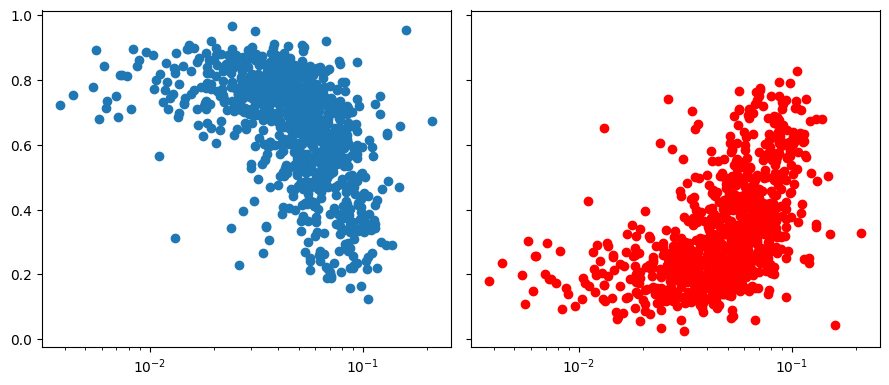

In [44]:
f, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(9,4))
plt.xscale("log")
plt.tight_layout()
ax[0].plot(DesempleoTasa[0], PorcporM["ERC_votes"]+PorcporM["JUNTS_votes"]+PorcporM["CUP_votes"], "o")
ax[1].plot(DesempleoTasa[0], PorcporM["PSC_votes"]+PorcporM["ECP_votes"]+PorcporM["PP_votes"]+PorcporM["VOX_votes"]+PorcporM["Cs_votes"], "ro")